# Baltimore-Columbia-Towson_PM2.5_Pollution_2019

We'll use data that we've previously used from [Opportunity Insights](https://opportunityinsights.org/data/?geographic_level=100&topic=0&paper_id=0#resource-listing) to look at general US college characteristics through data analysis and data visualizations with [Plotly](https://plot.ly/python/).

## Import Packages

Think of our Python packages as the "ingredients" of our Python code. Without these imported, we won't be able to carry out any of our Python code instructions. We'll use a couple of packages to help with manipulating our data (pandas and numpy) and a package to help with making data visualizations (plotly express)

In [0]:
# import libraries that we'll use to re-do our data analysis with Excel
import pandas as pd # for data analysis
import numpy as np # for data analysis
import matplotlib.pyplot as plt # for initial graphs
import plotly.express as px # for interactive graphs

## Import Data

We'll use the same data that we used in our first few classes that gives us information about US Colleges and their social mobility impact. 

We can import data from a website link that houses the data (in github or a Google Sheet) or directly from a file in our machine. Here, we'll import information directly from a file link on [github](https://github.com/jhu-decision-analytics/college-social-mobility-trends)

In [0]:
# import data from github

# redefine the link to our uploaded csv file as something that's shorter and more descriptive
air_info = "https://raw.githubusercontent.com/LTLUTUO/Baltimore-Columbia-Towson_PM2.5_Pollution_2019/master/ad_viz_plotval_data.csv"

# import this csv into our python notebook and define as a new dataframe
df_air_info = pd.read_csv(air_info)

In [3]:
# preview the dataframe
df_air_info.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/09/2019,AQS,240051007,1,4.2,ug/m3 LC,18,Padonia,1,100.0,88101,PM2.5 - Local Conditions,12580,"Baltimore-Columbia-Towson, MD",24,Maryland,5,Baltimore,39.460478,-76.633543
1,01/21/2019,AQS,240051007,1,2.3,ug/m3 LC,10,Padonia,1,100.0,88101,PM2.5 - Local Conditions,12580,"Baltimore-Columbia-Towson, MD",24,Maryland,5,Baltimore,39.460478,-76.633543
2,02/02/2019,AQS,240051007,1,26.3,ug/m3 LC,81,Padonia,1,100.0,88101,PM2.5 - Local Conditions,12580,"Baltimore-Columbia-Towson, MD",24,Maryland,5,Baltimore,39.460478,-76.633543
3,02/14/2019,AQS,240051007,1,4.2,ug/m3 LC,18,Padonia,1,100.0,88101,PM2.5 - Local Conditions,12580,"Baltimore-Columbia-Towson, MD",24,Maryland,5,Baltimore,39.460478,-76.633543
4,02/26/2019,AQS,240051007,1,6.2,ug/m3 LC,26,Padonia,1,100.0,88101,PM2.5 - Local Conditions,12580,"Baltimore-Columbia-Towson, MD",24,Maryland,5,Baltimore,39.460478,-76.633543


## Aggregate Data

In Excel, we use the Pivot Table button to create aggregated views and charts with larger datasets. This allowed us to gain some high-level understanding of our data without needing to do much. 

We can create similar types of aggregated tables in two main ways with Python: 

### Pivot Tables in Python

We can use the pandas **pivot_table** function to essentially create a pivot table in our python notebook.

This function is set up nicely to mimic exactly what we've done with pivot tables in Excel, which can be useful if we want to keep a legacy of our work and manipulations or if we want to work with larger datasets that might make Excel crash. The general formula to create a pivot table with Python is: 

```
new_dataframe_name = pd.pivot_table(old_dataframe, values = columns_we_want_in_values_fields_of_pivot_table, 
                                       index = columns_we_want_as_row_fields, 
                                       columns = columns_we_want_as_column_fields, 
                                       aggfunc = np.function_we_want_to_perform_on_values).reset_index()

```

If we want to use more than one column in the values, index, or column fields, then we need to make them into a list. For example, if we wanted to use Day Name and Date Range as our row fields, we would write index = ["tier", "tier_name"]




#### pivot table with college characteristic data

In [4]:
# get a list of all of the dataframe column names
df_air_info.columns.tolist()

['Date',
 'Source',
 'Site ID',
 'POC',
 'Daily Mean PM2.5 Concentration',
 'UNITS',
 'DAILY_AQI_VALUE',
 'Site Name',
 'DAILY_OBS_COUNT',
 'PERCENT_COMPLETE',
 'AQS_PARAMETER_CODE',
 'AQS_PARAMETER_DESC',
 'CBSA_CODE',
 'CBSA_NAME',
 'STATE_CODE',
 'STATE',
 'COUNTY_CODE',
 'COUNTY',
 'SITE_LATITUDE',
 'SITE_LONGITUDE']

In [0]:
# create a  pivot table of average graduation rate in 2013 per college tier

df_collective_air_info = pd.pivot_table(df_air_info,
                                  values = 'Daily Mean PM2.5 Concentration',
                                  index = 'Date',
                                  aggfunc = np.mean).reset_index()

In [6]:
df_collective_air_info

,Date,Daily Mean PM2.5 Concentration
0,01/01/2019,3.250
1,01/02/2019,5.475
2,01/03/2019,6.400
3,01/04/2019,11.675
4,01/05/2019,4.450
...,...,...
360,12/27/2019,11.125
361,12/28/2019,15.125
362,12/29/2019,16.750
363,12/30/2019,2.650


In [0]:
# create a  pivot table of average graduation rate in 2013 per college tier
df_site_air_info = pd.pivot_table(df_air_info,
                                  values = 'Daily Mean PM2.5 Concentration',
                                  index = 'Site Name',
                                  aggfunc = np.sum).reset_index()


In [23]:
df_site_air_info

,Site Name,Daily Mean PM2.5 Concentration
0,Edgewood,2493.1
1,Essex,488.0
2,Howard County Near Road,2649.4
3,Oldtown,3890.2
4,Padonia,2862.8


# Data Visualizations with Plotly

## Bar Graph of Average Graduation Rate per College Tier

In [7]:
# bring up dataframe pivot table made previously
df_collective_air_info

,Date,Daily Mean PM2.5 Concentration
0,01/01/2019,3.250
1,01/02/2019,5.475
2,01/03/2019,6.400
3,01/04/2019,11.675
4,01/05/2019,4.450
...,...,...
360,12/27/2019,11.125
361,12/28/2019,15.125
362,12/29/2019,16.750
363,12/30/2019,2.650


We'll use plotly express to create an interactive data visualization (bar chart) with the data in our pivot table. 

The general formula for a bar chart with plotly express is: 
```
chart_name = px.bar(df, # dataframe of the data we want to plot
                     x = "column on the x axis", 
                     y = "column on the y axis", 
                     color = "how to categorize data with different colors", 
                     hover_name = "values we want to show up when we hover over the chart", 
                    title = "chart title", 
                    labels = {"column_name": "new label", "column_name": "new label"}, # renaming labels
                    orientation = "h" # change the x, y values to make a horizontal bar chart
                    )
```

You can also use this formula with data visualizations other than bar charts. For a full library of data visualizations with plotly express look [here](https://plot.ly/python/plotly-express/).

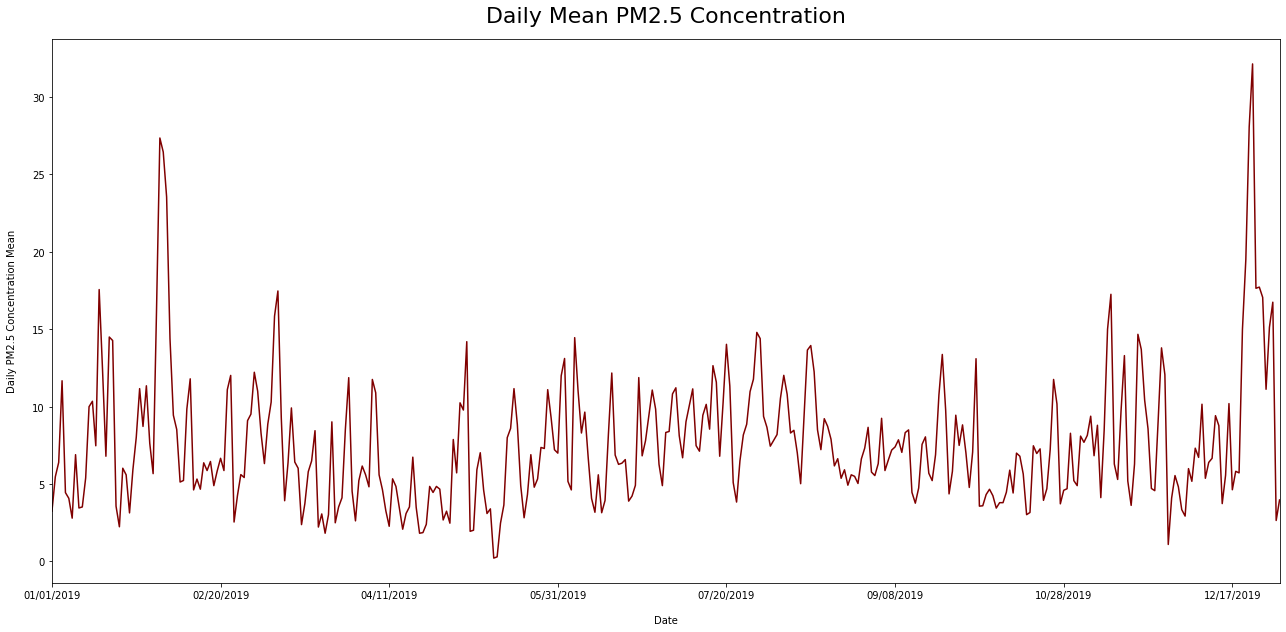

In [20]:
# make our pivot table into an interactive bar chart
line_collective_air_info = df_collective_air_info.set_index('Date')['Daily Mean PM2.5 Concentration'].plot(figsize=(22, 10), linewidth=1.5, color='maroon')
plt.xlabel("Date", labelpad=15)
plt.ylabel("Daily PM2.5 Concentration Mean", labelpad=15)
plt.title("Daily Mean PM2.5 Concentration", y=1.02, fontsize=22);

In [0]:
# make our pivot table into an interactive bar chart
bar_site_info = px.bar(df_site_air_info, # dataframe of the data we want to plot
                     x = "Site Name", 
                     y = "Daily Mean PM2.5 Concentration", 
                     #color = "how to categorize data with different colors", 
                     hover_name = "Daily Mean PM2.5 Concentration", 
                    title = "PM2.5 Pollution in Different Sites in Baltimore-Columbia-Townson Area in 2019", 
                    labels = {"Daily Mean PM2.5 Concentration": "Total PM2.5 Pollution in 2019", "grad_rate_150_p_2013": "Graduation Rate in 2013"}, # renaming labels
                    #orientation = "h" # change the x, y values to make a horizontal bar chart
                    )

In [28]:
bar_site_info